In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import nltk
from nltk.corpus import stopwords
import langdetect 
from langdetect import detect
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
from nltk.stem import PorterStemmer
from nltk import word_tokenize

# Import dataset

##### Cases/tests/death data 

In [2]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(url, error_bad_lines=False)

##### Published papers data 

In [3]:
url = 'https://raw.githubusercontent.com/nicholasmfraser/covid19_preprints/master/data/covid19_preprints.csv'
paper_df = pd.read_csv(url, error_bad_lines=False)

# Published Papers : DATA CLEANING  

In [4]:
print('There are', str(len(paper_df)), 'papers in the dataset')

There are 7380 papers in the dataset


In [5]:
print('There are', str(paper_df.shape[1]), 'columns in the dataset')

There are 6 columns in the dataset


#### Check the dates 

In [74]:
paper_df['posted_date'] = pd.to_datetime(paper_df['posted_date'])
print('intial date :', paper_df['posted_date'].min())
print('last date :', paper_df['posted_date'].max())
print('number of days : ', str(paper_df['posted_date'].max() - paper_df['posted_date'].min()))

intial date : 2018-08-04 00:00:00
last date : 2020-05-03 00:00:00
number of days :  638 days 00:00:00


In [76]:
paper_df = paper_df[paper_df['posted_date'] > '2019-12-01']
print('intial date :', paper_df['posted_date'].min())
print('last date :', paper_df['posted_date'].max())
print('number of days : ', str(paper_df['posted_date'].max() - paper_df['posted_date'].min()))

intial date : 2020-01-16 00:00:00
last date : 2020-05-03 00:00:00
number of days :  108 days 00:00:00


In [6]:
paper_df.head(1)

,source,doi,arxiv_id,posted_date,title,abstract
0,AfricArXiv (OSF),10.31730/osf.io/e7bk4,NaN,2020-04-02,"ACE-2 in the highlight of COVID-19, A proposed...",<p>Pneumonia caused by the novel corona virus ...


#### Remove html symbols 

In [7]:
def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', str(raw_html))
  return cleantext
    
paper_df['abstract'] = paper_df['abstract'].apply(cleanhtml)

In [8]:
paper_df.head(5)

,source,doi,arxiv_id,posted_date,title,abstract
0,AfricArXiv (OSF),10.31730/osf.io/e7bk4,NaN,2020-04-02,"ACE-2 in the highlight of COVID-19, A proposed...",Pneumonia caused by the novel corona virus has...
1,AfricArXiv (OSF),10.31730/osf.io/b7eqj,NaN,2020-04-28,Covid-19 et handicap mental/Autisme et autres ...,The Covid-19 is challenging our health systems...
2,AfricArXiv (OSF),10.31730/osf.io/65b8f,NaN,2020-05-02,Ghana’s Preparedness Now and For Future Pandemics,The future of nations in the face of the rampa...
3,AfricArXiv (OSF),10.31730/osf.io/sw6g2,NaN,2020-04-30,PSYCHOLOGICAL DISTRESS EXPERIENCES OF NIGERIAN...,This study examined the psychological distress...
4,AfricArXiv (OSF),10.31730/osf.io/sy54p,NaN,2020-03-10,THE CAUSE OF PANIC AT THE OUTBREAK OF COVID-19...,Lack of proper messaging at an outbreak of a n...


In [10]:
paper_df = paper_df.drop(['doi', 'arxiv_id'], axis = 1)

In [11]:
paper_df.head()

,source,posted_date,title,abstract
0,AfricArXiv (OSF),2020-04-02,"ace-2 in the highlight of covid-19, a proposed...",Pneumonia caused by the novel corona virus has...
1,AfricArXiv (OSF),2020-04-28,covid-19 et handicap mental/autisme et autres ...,The Covid-19 is challenging our health systems...
2,AfricArXiv (OSF),2020-05-02,ghana’s preparedness now and for future pandemics,The future of nations in the face of the rampa...
3,AfricArXiv (OSF),2020-04-30,psychological distress experiences of nigerian...,This study examined the psychological distress...
4,AfricArXiv (OSF),2020-03-10,the cause of panic at the outbreak of covid-19...,Lack of proper messaging at an outbreak of a n...


##### Upper to lower cases 

In [13]:
paper_df['title'] = paper_df['title'].str.lower()

In [14]:
paper_df.head(3)

,source,posted_date,title,abstract
0,AfricArXiv (OSF),2020-04-02,"ace-2 in the highlight of covid-19, a proposed...",Pneumonia caused by the novel corona virus has...
1,AfricArXiv (OSF),2020-04-28,covid-19 et handicap mental/autisme et autres ...,The Covid-19 is challenging our health systems...
2,AfricArXiv (OSF),2020-05-02,ghana’s preparedness now and for future pandemics,The future of nations in the face of the rampa...


##### Languages 

In [15]:
paper_df['language'] = paper_df['title'].apply(detect)

In [16]:
print(100*paper_df['language'].value_counts()/len(paper_df))

en    95.867209
es     1.165312
it     0.921409
pt     0.609756
fr     0.284553
id     0.271003
ca     0.149051
ro     0.149051
de     0.121951
vi     0.108401
ru     0.067751
da     0.054201
uk     0.054201
bg     0.040650
tr     0.027100
sq     0.013550
et     0.013550
hr     0.013550
mk     0.013550
fa     0.013550
cy     0.013550
nl     0.013550
af     0.013550
Name: language, dtype: float64


In [17]:
paper_df = paper_df[paper_df['language'] == 'en']

In [18]:
print(100*paper_df['language'].value_counts()/len(paper_df))

en    100.0
Name: language, dtype: float64


In [19]:
# We are making sure there are only english words
# nltk.download('words')
# words = set(nltk.corpus.words.words())

# def keep_only_english(column): 
#     return " ".join(w for w in nltk.wordpunct_tokenize(column) if w in words or not w.isalpha())

paper_df = paper_df[paper_df['title'].str.contains('[A-Za-z0-9]')]
paper_df = paper_df[paper_df['abstract'].str.contains('[A-Za-z0-9]')]
# Remove chinese characters 
paper_df['title'] = paper_df['title'].str.replace(r'[^\x00-\x7F]+', '')
paper_df['abstract'] = paper_df['abstract'].str.replace(r'[^\x00-\x7F]+', '')


# paper_df['title'] = paper_df['title'].apply(keep_only_english)
# paper_df['abstract'] = paper_df['abstract'].apply(keep_only_english)

In [20]:
paper_df.head(2)

,source,posted_date,title,abstract,language
0,AfricArXiv (OSF),2020-04-02,"ace-2 in the highlight of covid-19, a proposed...",Pneumonia caused by the novel corona virus has...,en
2,AfricArXiv (OSF),2020-05-02,ghanas preparedness now and for future pandemics,The future of nations in the face of the rampa...,en


In [21]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
tfid_vectorizer.fit(paper_df['title'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items() 
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)


In [22]:
dictionary

dict_items([('ace', 330), ('in', 3983), ('the', 7898), ('highlight', 3691), ('of', 5523), ('covid', 1982), ('19', 66), ('proposed', 6326), ('pathology', 5793), ('and', 620), ('potential', 6105), ('correlations', 1933), ('ghanas', 3433), ('preparedness', 6168), ('now', 5450), ('for', 3250), ('future', 3346), ('pandemics', 5711), ('psychological', 6390), ('distress', 2483), ('experiences', 2991), ('nigerians', 5390), ('amid', 576), ('pandemic', 5709), ('cause', 1370), ('panic', 5718), ('at', 810), ('outbreak', 5644), ('south', 7407), ('africa', 444), ('comparative', 1682), ('analysis', 608), ('with', 8590), ('similar', 7292), ('china', 1482), ('new', 5367), ('york', 8660), ('amantadine', 569), ('disrupts', 2466), ('lysosomal', 4716), ('gene', 3387), ('expression', 3028), ('therapy', 7914), ('covid19', 1983), ('identification', 3859), ('enrichment', 2802), ('secrete', 7089), ('cis', 1524), ('acting', 347), ('rna', 6906), ('elements', 2696), ('coronaviridae', 1908), ('other', 5637), ('sing

In [158]:
paper_df.head()

,source,doi,arxiv_id,posted_date,title,abstract,language
0,AfricArXiv (OSF),10.31730/osf.io/e7bk4,NaN,2020-04-02,"ace-2 in the highlight of covid-19, a proposed...",Pneumonia caused by the novel corona virus has...,en
2,AfricArXiv (OSF),10.31730/osf.io/65b8f,NaN,2020-05-02,ghanas preparedness now and for future pandemics,The future of nations in the face of the rampa...,en
3,AfricArXiv (OSF),10.31730/osf.io/sw6g2,NaN,2020-04-30,psychological distress experiences of nigerian...,This study examined the psychological distress...,en
4,AfricArXiv (OSF),10.31730/osf.io/sy54p,NaN,2020-03-10,the cause of panic at the outbreak of covid-19...,Lack of proper messaging at an outbreak of a n...,en
5,bioRxiv,10.1101/2020.04.05.026187,NaN,2020-04-05,amantadine disrupts lysosomal gene expression;...,AbstractSARS-coronavirus 2 is the causal agent...,en


##### Tokens identification

In [25]:
nltk.download('punkt')

def identify_tokens(column):
    review = column
    tokens = nltk.word_tokenize(review)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

paper_df['words_title'] = paper_df['title'].apply(identify_tokens)
paper_df['words_abstract'] = paper_df['abstract'].apply(identify_tokens)

[nltk_data] Downloading package punkt to C:\Users\User
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
paper_df.head(5)

,source,posted_date,title,abstract,language,words_title,words_abstract
0,AfricArXiv (OSF),2020-04-02,"ace-2 in the highlight of covid-19, a proposed...",Pneumonia caused by the novel corona virus has...,en,"[in, the, highlight, of, a, proposed, patholog...","[Pneumonia, caused, by, the, novel, corona, vi..."
2,AfricArXiv (OSF),2020-05-02,ghanas preparedness now and for future pandemics,The future of nations in the face of the rampa...,en,"[ghanas, preparedness, now, and, for, future, ...","[The, future, of, nations, in, the, face, of, ..."
3,AfricArXiv (OSF),2020-04-30,psychological distress experiences of nigerian...,This study examined the psychological distress...,en,"[psychological, distress, experiences, of, nig...","[This, study, examined, the, psychological, di..."
4,AfricArXiv (OSF),2020-03-10,the cause of panic at the outbreak of covid-19...,Lack of proper messaging at an outbreak of a n...,en,"[the, cause, of, panic, at, the, outbreak, of,...","[Lack, of, proper, messaging, at, an, outbreak..."
5,bioRxiv,2020-04-05,amantadine disrupts lysosomal gene expression;...,AbstractSARS-coronavirus 2 is the causal agent...,en,"[amantadine, disrupts, lysosomal, gene, expres...","[is, the, causal, agent, of, the, outbreak, en..."


In [27]:
stemming = PorterStemmer()

def stem_list(column):
    my_list = column
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

paper_df['stemmed_words_title'] = paper_df['words_title'].apply(stem_list)
paper_df['stemmed_words_abstract'] = paper_df['words_abstract'].apply(stem_list)

In [28]:
paper_df.head(3)

,source,posted_date,title,abstract,language,words_title,words_abstract,stemmed_words_title,stemmed_words_abstract
0,AfricArXiv (OSF),2020-04-02,"ace-2 in the highlight of covid-19, a proposed...",Pneumonia caused by the novel corona virus has...,en,"[in, the, highlight, of, a, proposed, patholog...","[Pneumonia, caused, by, the, novel, corona, vi...","[in, the, highlight, of, a, propos, patholog, ...","[pneumonia, caus, by, the, novel, corona, viru..."
2,AfricArXiv (OSF),2020-05-02,ghanas preparedness now and for future pandemics,The future of nations in the face of the rampa...,en,"[ghanas, preparedness, now, and, for, future, ...","[The, future, of, nations, in, the, face, of, ...","[ghana, prepared, now, and, for, futur, pandem]","[the, futur, of, nation, in, the, face, of, th..."
3,AfricArXiv (OSF),2020-04-30,psychological distress experiences of nigerian...,This study examined the psychological distress...,en,"[psychological, distress, experiences, of, nig...","[This, study, examined, the, psychological, di...","[psycholog, distress, experi, of, nigerian, am...","[thi, studi, examin, the, psycholog, distress,..."


In [29]:
nltk.download('stopwords')
stops = set(stopwords.words("english"))                  

def remove_stops(column):
    my_list = column
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

paper_df['stem_meaningful_title'] = paper_df['stemmed_words_title'].apply(remove_stops)
paper_df['stem_meaningful_abstract'] = paper_df['stemmed_words_abstract'].apply(remove_stops)
paper_df['meaningful_title'] = paper_df['words_title'].apply(remove_stops)
paper_df['meaningful_abstract'] = paper_df['words_abstract'].apply(remove_stops)

[nltk_data] Downloading package stopwords to C:\Users\User
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
paper_df.tail(3)

,source,posted_date,title,abstract,language,words_title,words_abstract,stemmed_words_title,stemmed_words_abstract,stem_meaningful_title,stem_meaningful_abstract,meaningful_title,meaningful_abstract
7377,arXiv,2020-05-01,early outbreak detection for proactive crisis ...,"During a disease outbreak, timely non-medica...",en,"[early, outbreak, detection, for, proactive, c...","[During, a, disease, outbreak, timely, interve...","[earli, outbreak, detect, for, proactiv, crisi...","[dure, a, diseas, outbreak, time, intervent, a...","[earli, outbreak, detect, proactiv, crisi, man...","[dure, diseas, outbreak, time, intervent, crit...","[early, outbreak, detection, proactive, crisis...","[During, disease, outbreak, timely, interventi..."
7378,arXiv,2020-05-01,heterogeneous contact networks in covid-19 spr...,We have two main aims in this paper. First w...,en,"[heterogeneous, contact, networks, in, spreadi...","[We, have, two, main, aims, in, this, paper, F...","[heterogen, contact, network, in, spread, the,...","[We, have, two, main, aim, in, thi, paper, fir...","[heterogen, contact, network, spread, role, so...","[We, two, main, aim, thi, paper, first, use, t...","[heterogeneous, contact, networks, spreading, ...","[We, two, main, aims, paper, First, use, theor..."
7379,arXiv,2020-05-01,inferring the infection fatality rate (ifr) of...,I use a very simple deterministic model for ...,en,"[inferring, the, infection, fatality, rate, if...","[I, use, a, very, simple, deterministic, model...","[infer, the, infect, fatal, rate, ifr, of, fro...","[I, use, a, veri, simpl, determinist, model, f...","[infer, infect, fatal, rate, ifr, behaviour, l...","[I, use, veri, simpl, determinist, model, spre...","[inferring, infection, fatality, rate, ifr, be...","[I, use, simple, deterministic, model, spread,..."


In [31]:
def assemble_stem(column):
    return ' '.join(column)

paper_df['stem_title'] = paper_df['stem_meaningful_title'].apply(assemble_stem)
paper_df['stem_abstract'] = paper_df['stem_meaningful_abstract'].apply(assemble_stem)
paper_df['m_title'] = paper_df['meaningful_title'].apply(assemble_stem)
paper_df['m_abstract'] = paper_df['meaningful_abstract'].apply(assemble_stem)

In [32]:
paper_df.head(3)

,source,posted_date,title,abstract,language,words_title,words_abstract,stemmed_words_title,stemmed_words_abstract,stem_meaningful_title,stem_meaningful_abstract,meaningful_title,meaningful_abstract,stem_title,stem_abstract,m_title,m_abstract
0,AfricArXiv (OSF),2020-04-02,"ace-2 in the highlight of covid-19, a proposed...",Pneumonia caused by the novel corona virus has...,en,"[in, the, highlight, of, a, proposed, patholog...","[Pneumonia, caused, by, the, novel, corona, vi...","[in, the, highlight, of, a, propos, patholog, ...","[pneumonia, caus, by, the, novel, corona, viru...","[highlight, propos, patholog, potenti, correl]","[pneumonia, caus, novel, corona, viru, ha, der...","[highlight, proposed, pathology, potential, co...","[Pneumonia, caused, novel, corona, virus, deri...",highlight propos patholog potenti correl,pneumonia caus novel corona viru ha deriv whol...,highlight proposed pathology potential correla...,Pneumonia caused novel corona virus derived wh...
2,AfricArXiv (OSF),2020-05-02,ghanas preparedness now and for future pandemics,The future of nations in the face of the rampa...,en,"[ghanas, preparedness, now, and, for, future, ...","[The, future, of, nations, in, the, face, of, ...","[ghana, prepared, now, and, for, futur, pandem]","[the, futur, of, nation, in, the, face, of, th...","[ghana, prepared, futur, pandem]","[futur, nation, face, rampag, effect, undoubte...","[ghanas, preparedness, future, pandemics]","[The, future, nations, face, rampaging, effect...",ghana prepared futur pandem,futur nation face rampag effect undoubtedli hi...,ghanas preparedness future pandemics,The future nations face rampaging effect undou...
3,AfricArXiv (OSF),2020-04-30,psychological distress experiences of nigerian...,This study examined the psychological distress...,en,"[psychological, distress, experiences, of, nig...","[This, study, examined, the, psychological, di...","[psycholog, distress, experi, of, nigerian, am...","[thi, studi, examin, the, psycholog, distress,...","[psycholog, distress, experi, nigerian, amid, ...","[thi, studi, examin, psycholog, distress, expe...","[psychological, distress, experiences, nigeria...","[This, study, examined, psychological, distres...",psycholog distress experi nigerian amid pandem,thi studi examin psycholog distress experi nig...,psychological distress experiences nigerians a...,This study examined psychological distress exp...


# EXPLORATION OF THE PUBLISHED PAPER DATASET

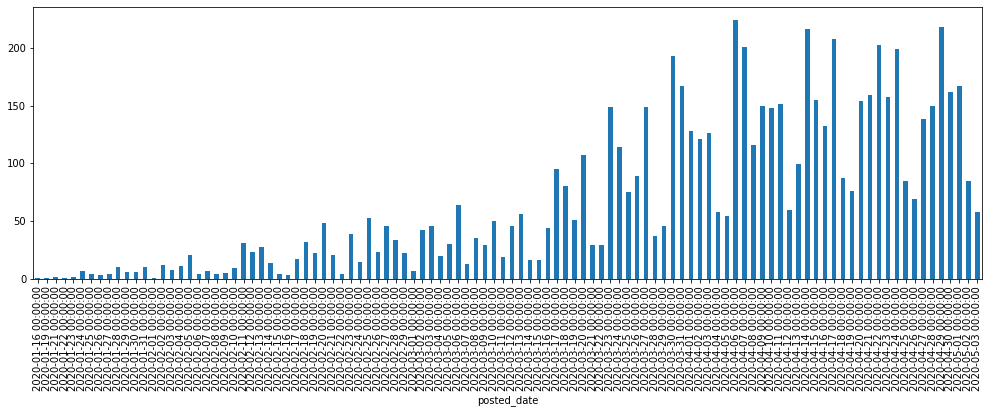

In [77]:
paper_df.groupby(paper_df["posted_date"]).count()['source'].plot(kind = 'bar', figsize = (17,5))

In [78]:
print(100*paper_df['source'].value_counts()/len(paper_df))
print('There are', str(len(paper_df['source'].value_counts())), 'sources in the dataset')
df = paper_df['source'].value_counts()

medRxiv             29.601357
SSRN                15.224767
arXiv                9.937800
ResearchGate         8.495900
Research Square      8.382810
bioRxiv              8.227311
Preprints.org        5.244558
OSF Preprints        3.505796
JMIR                 3.109980
PsyArXiv (OSF)       2.417303
ChemRxiv             2.120441
SocArXiv (OSF)       0.918858
WHO                  0.579587
Figshare             0.494770
Zenodo               0.367543
SAGE                 0.226180
SciELO               0.183772
IndiaRxiv (OSF)      0.169635
Techrxiv (IEEE)      0.113090
ScienceOpen          0.113090
EdArXiv (OSF)        0.098954
engrXiv (OSF)        0.084818
EarthArXiv (OSF)     0.070681
EcoEvoRxiv (OSF)     0.070681
NutriXiv (OSF)       0.056545
AfricArXiv (OSF)     0.056545
SportRxiv (OSF)      0.028273
INA-Rxiv (OSF)       0.028273
Frenxiv (OSF)        0.028273
LawArXiv (OSF)       0.028273
MediArXiv (OSF)      0.014136
Name: source, dtype: float64
There are 31 sources in the dataset


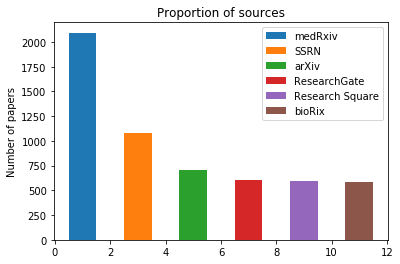

In [87]:
medRxiv_len = paper_df[paper_df['source'] == 'medRxiv'].shape[0]
SSRN_len = paper_df[paper_df['source'] == 'SSRN'].shape[0]
RG_len = paper_df[paper_df['source'] == 'ResearchGate'].shape[0]
arXiv_len = paper_df[paper_df['source'] == 'arXiv'].shape[0]
RS_len = paper_df[paper_df['source'] == 'Research Square'].shape[0]
bioRxiv_len = paper_df[paper_df['source'] == 'bioRxiv'].shape[0]

plt.bar(1,medRxiv_len,1, label="medRxiv")
plt.bar(3,SSRN_len,1, label="SSRN")
plt.bar(5,arXiv_len,1, label="arXiv")
plt.bar(7,RG_len,1, label="ResearchGate")
plt.bar(9,RS_len,1, label="Research Square")
plt.bar(11,bioRxiv_len,1, label="bioRix")

plt.legend()
plt.ylabel('Number of papers')
plt.title('Proportion of sources')
plt.show()

major_sources = ['medRxiv', 'SSRN', 'ResearchGate', 'arXiv', 'Research Square', 'bioRix']

In [90]:
paper_df.plot.bar(figsize = (17,5), stacked = True, label = 'source', x = 'posted_date', y = 'count')

KeyError: 'count'

In [119]:
nltk.download('averaged_perceptron_tagger')
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(paper_df['m_title'])
cv_matrix = cv_matrix.toarray()
cv_matrix
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
df_matrix = pd.DataFrame(cv_matrix, columns=vocab)
count_title = df_matrix.sum(axis = 0).reset_index()
count_title['word'] = count_title['index']
count_title['count'] = count_title.iloc[:,1]
count_title = count_title.drop(['index'], axis =1)
count_title = count_title.sort_values(by = ['count'], ascending = False)

def add_post_tag(column):
    text = word_tokenize(column)
    return nltk.pos_tag(text)[0][1]

count_title['post_tag'] = count_title['word'].apply(add_post_tag)
count_title[count_title['post_tag'] == 'JJ']
# count_title.head(60)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User 1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,0,word,count,post_tag
1153,447,clinical,447,JJ
2331,411,epidemic,411,JJ
5317,260,potential,260,JJ
6492,251,social,251,JJ
6332,172,severe,172,JJ
...,...,...,...,...
3499,1,infographic,1,JJ
3492,1,influential,1,JJ
3444,1,inducible,1,JJ
3426,1,indicative,1,JJ


In [124]:
from wordcloud import WordCloud
wc = WordCloud().generate_from_frequencies(count_title[['word', 'count']])
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

TypeError: '<' not supported between instances of 'str' and 'int'

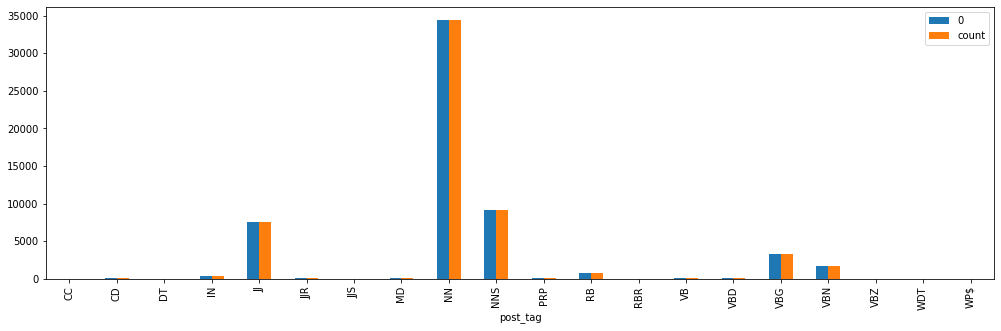

In [123]:
count_title.groupby(count_title["post_tag"]).sum().plot(kind = 'bar', figsize = (17,5))

In [39]:
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(paper_df['stem_abstract'])
cv_matrix = cv_matrix.toarray()
cv_matrix
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
df_matrix = pd.DataFrame(cv_matrix, columns=vocab)
count_abstract = df_matrix.sum(axis = 0).reset_index()
count_abstract['word'] = count_abstract['index']
count_abstract['count'] = count_abstract.iloc[:,1]
count_abstract = count_abstract.drop(['index'], axis =1)
count_abstract = count_abstract.sort_values(by = ['count'], ascending = False)
count_abstract.iloc[0:60]

,0,word,count
9552,6885,patient,6885
13080,6308,thi,6308
6489,5928,infect,5928
1962,5571,case,5571
14191,5568,wa,5568
13881,5295,use,5295
14257,4526,we,4526
8255,4362,model,4362
3600,4304,diseas,4304
12494,4165,studi,4165


In [230]:
len(count_abstract)

22625

In [213]:
count_title.shape

(7684, 3)

In [143]:
vocab_bef_stem_df['words'] = dictionary.keys()


AttributeError: 'dict_items' object has no attribute 'keys'

## Exploration of the tests data 

#### Keep only countries that conduct tests

In [16]:
tests_df = df[df.isnull()['total_tests']==False]

In [129]:
currents_deaths_df = tests_df.groupby('location')['total_deaths'].max().reset_index()

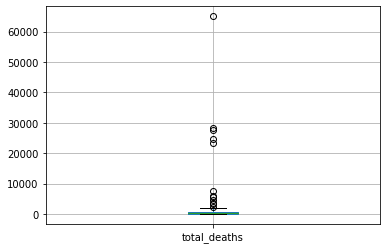

In [132]:
currents_deaths_df.boxplot()

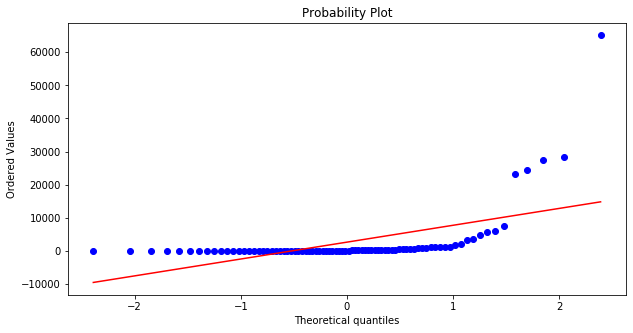

In [141]:
fig = plt.figure(figsize=(10,5))
res = stats.probplot(currents_deaths_df['total_deaths'], plot=plt)

In [153]:
countries_selected = currents_deaths_df[currents_deaths_df['total_deaths'] > 2000]['location'].reset_index().drop(['index'], axis = 1)

In [154]:
countries_selected

,location
0,Belgium
1,Canada
2,France
3,Germany
4,Iran
5,Italy
6,Netherlands
7,Spain
8,Sweden
9,Turkey


In [155]:
tests_countries_df = tests_df.merge(countries_selected, how='inner', on='location')

In [157]:
len(tests_countries_df)

453

In [73]:
tests_df.loc[:, ['location','total_cases', 'total_deaths']] 

,location,total_cases,total_deaths
496,Argentina,1715,60
497,Argentina,1795,65
498,Argentina,1894,79
499,Argentina,1975,82
501,Argentina,2203,95
...,...,...,...
14722,Zimbabwe,31,4
14723,Zimbabwe,31,4
14724,Zimbabwe,32,4
14725,Zimbabwe,32,4


In [57]:
max_df = tests_df.groupby('location', as_index = 'False').max()

In [76]:
max_df.loc[:,['location', 'total_cases', 'total_deaths']].head(82)

,location,total_cases,total_deaths
0,Argentina,4415,218
1,Australia,6762,92
2,Austria,15558,596
3,Bahrain,3284,8
4,Bangladesh,7667,168
...,...,...,...
77,United Kingdom,177454,27510
78,United States,1103781,65068
79,Uruguay,652,17
80,Vietnam,270,0


In [58]:
country_tests = list(tests_df['location'].unique())

In [59]:
country_tests

['Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Belarus',
 'Bolivia',
 'Canada',
 'Switzerland',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Czech Republic',
 'Germany',
 'Denmark',
 'Ecuador',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'United Kingdom',
 'Ghana',
 'Greece',
 'Hong Kong',
 'Croatia',
 'Hungary',
 'Indonesia',
 'India',
 'Ireland',
 'Iran',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'South Korea',
 'Lithuania',
 'Luxembourg',
 'Latvia',
 'Morocco',
 'Mexico',
 'Myanmar',
 'Malaysia',
 'Nigeria',
 'Netherlands',
 'Norway',
 'Nepal',
 'New Zealand',
 'Pakistan',
 'Panama',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Paraguay',
 'Qatar',
 'Romania',
 'Russia',
 'Rwanda',
 'Senegal',
 'Singapore',
 'El Salvador',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Sweden',
 'Thailand',
 'Tunisia',
 'Turkey',
 'Taiwan',
 'Uganda',
 'Ukraine',
 'Uruguay',
 'United States',
 'Vietnam',
 'Sou

<Figure size 1440x720 with 0 Axes>

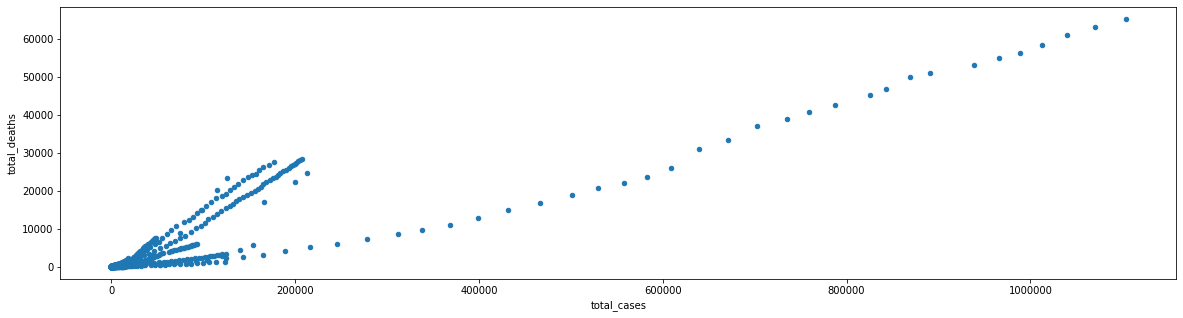

In [40]:
plt.figure(figsize = (20,10))
tests_df.plot.scatter(x = 'total_cases', y = 'total_deaths', figsize = (20,5))

<Figure size 1440x720 with 0 Axes>

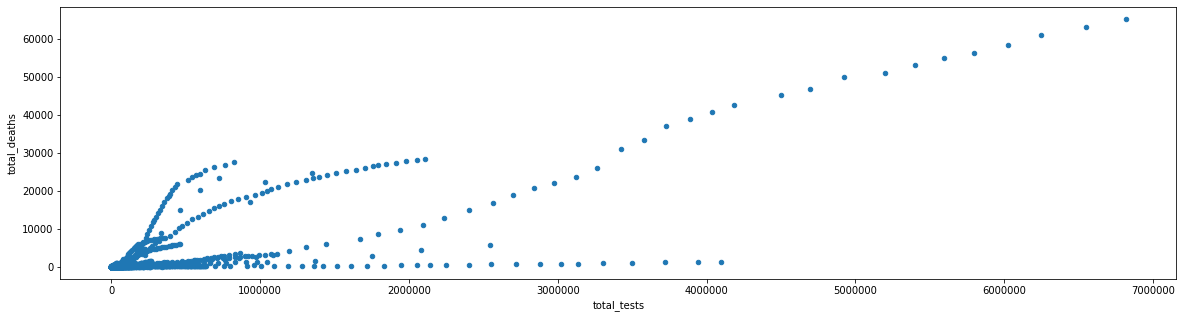

In [41]:
plt.figure(figsize = (20,10))
tests_df.plot.scatter(x = 'total_tests', y = 'total_deaths', figsize = (20,5))

In [42]:
import seaborn as sns

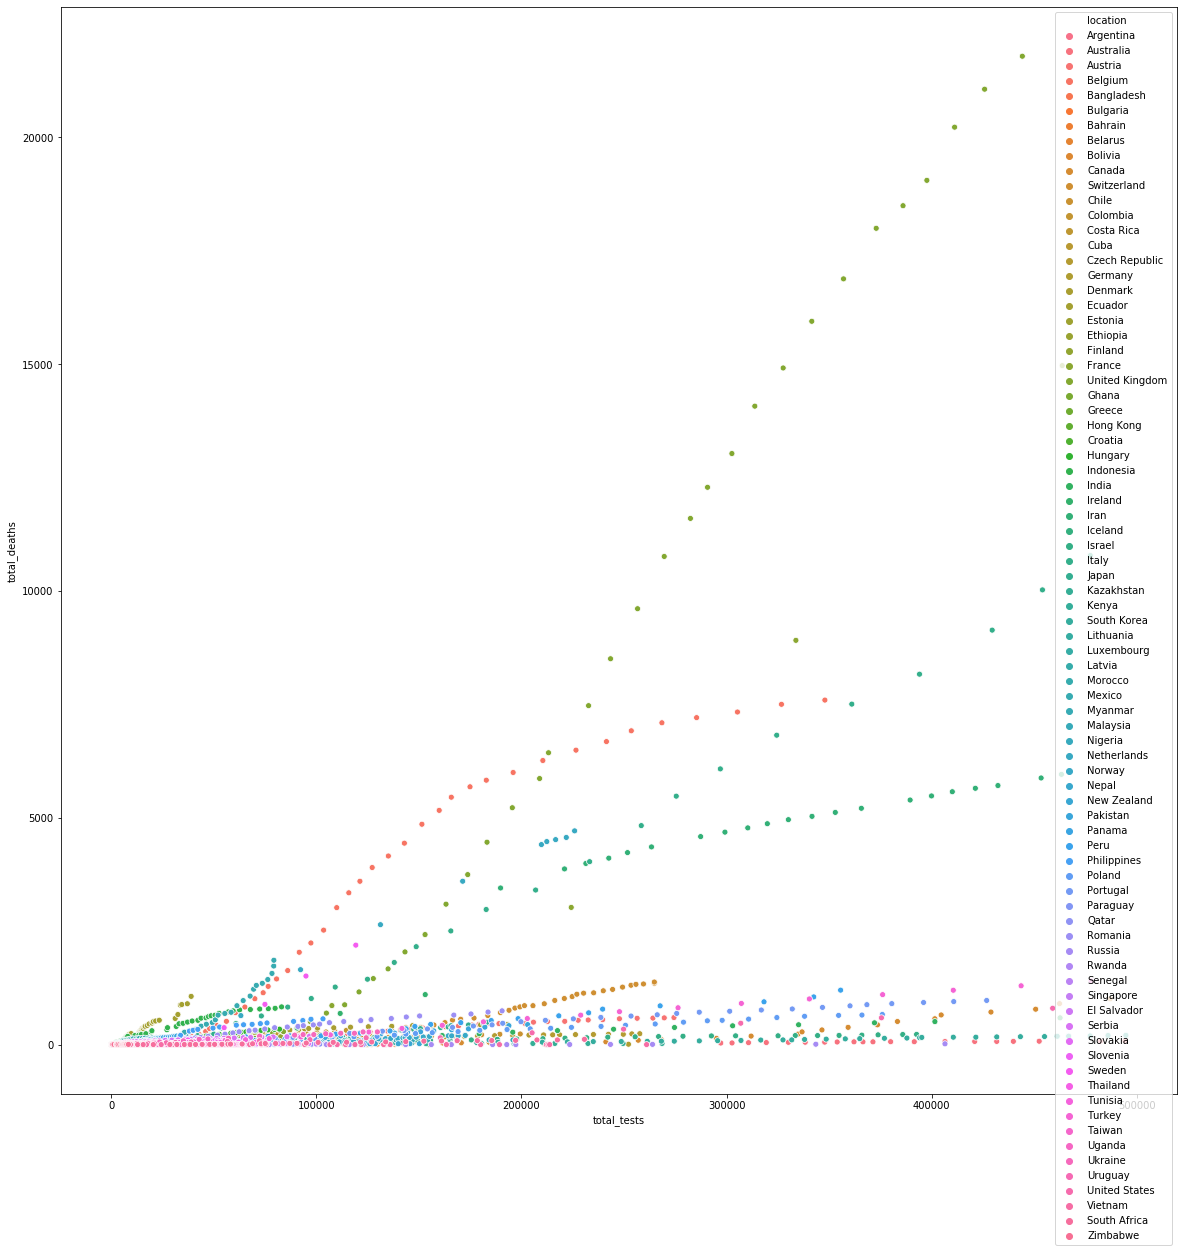

In [69]:
plt.figure(figsize=(20,20))
g =sns.scatterplot(x="total_tests", y="total_deaths",
              hue="location",
              data=tests_df[tests_df['total_tests'] < 500000]);

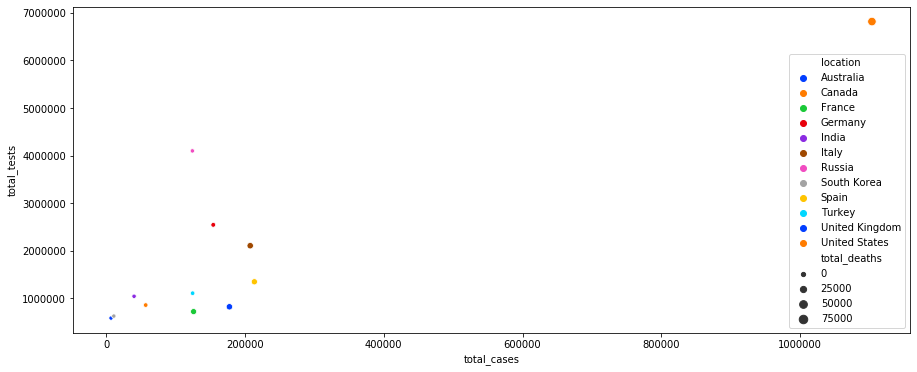

In [98]:
plt.figure(figsize=(15,6))
g =sns.scatterplot(x="total_cases", y="total_tests",
              hue='location',
              data=max_df[max_df['total_tests'] > 500000], size = 'total_deaths', legend = 'brief', palette = 'bright');

In [105]:
plt.figure(figsize=(15,6))
g =sns.scatterplot(x="total_cases", y="total_tests",
              hue='location',
              data=tests_df[tests_df['location'] in ['Australia', 'Canada', 'France', 'Germany', 'India', 'Italy', 'Russia', 'South Korea', 'Spain', 'Turkey', 'United Kingdom', 'United States']], size = 'total_deaths', legend = 'brief', palette = 'bright');

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1080x432 with 0 Axes>

In [65]:
max_df = max_df.reset_index()
max_df.head()

,location,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,Argentina,ARG,2020-05-01,4415,344,218,18,97.686,7.611,4.823,0.398,58685.0,3047.0,1.298,0.067,tests performed
1,Australia,AUS,2020-05-01,6762,431,92,6,265.178,16.902,3.608,0.235,588868.0,25227.0,23.093,0.989,tests performed
2,Austria,AUT,2020-05-03,15558,1141,596,31,1727.438,126.688,66.175,3.442,274355.0,36327.0,30.462,4.033,tests performed
3,Bahrain,BHR,2020-05-03,3284,301,8,1,1929.968,176.894,4.702,0.588,143030.0,5334.0,84.057,3.135,units unclear
4,Bangladesh,BGD,2020-05-01,7667,641,168,15,46.554,3.892,1.020,0.091,70239.0,5573.0,0.426,0.034,samples tested


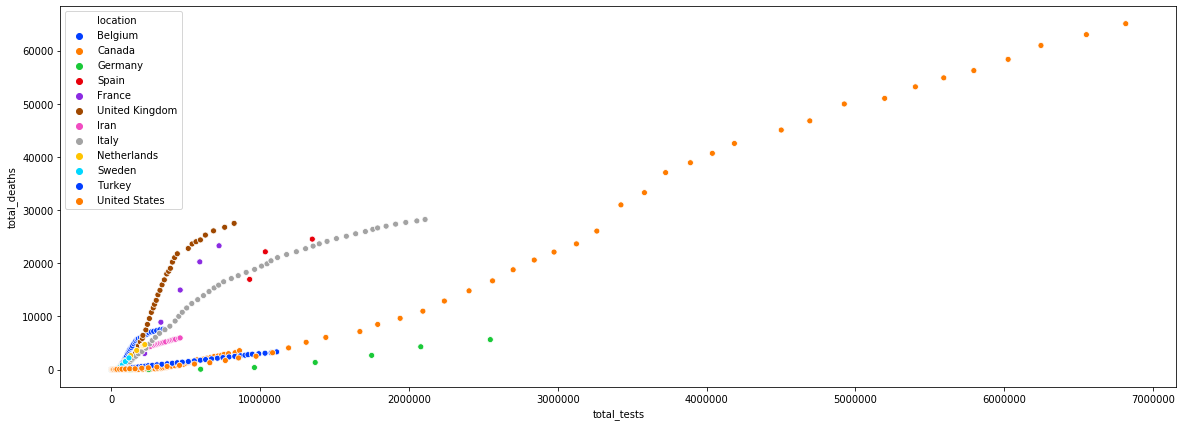

In [160]:
plt.figure(figsize=(20,7))
g =sns.scatterplot(x="total_tests", y="total_deaths", palette = 'bright',
              hue="location",
              data=tests_countries_df);

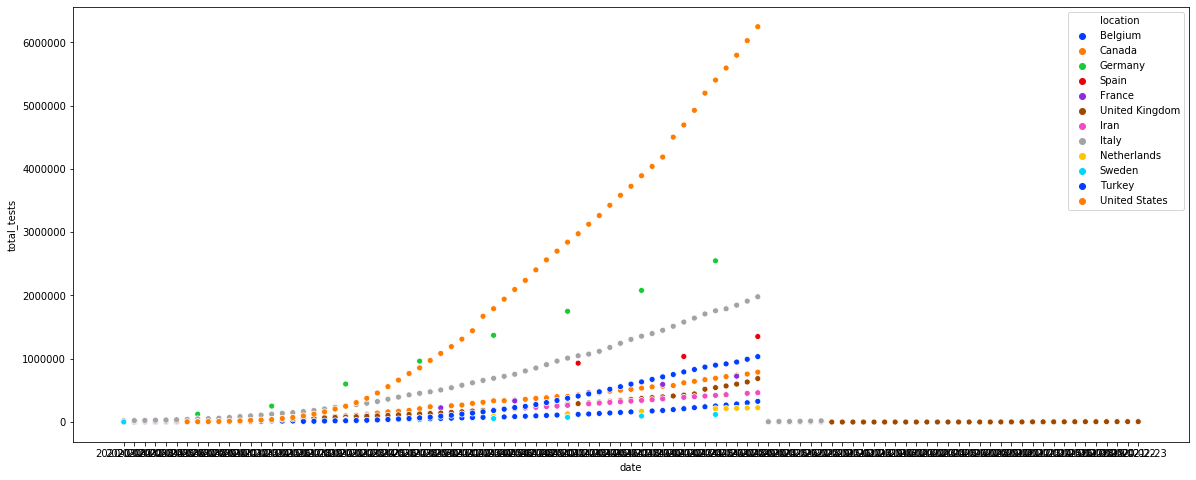

In [230]:
fig, ax = plt.subplots(figsize=(20,8))
# ax.set(yscale="log")
g =sns.scatterplot(x="date", y="total_tests", palette = 'bright',
              hue="location",
              data=tests_countries_df[(tests_countries_df['date'] < '2020-05-01')]) #  & (tests_countries_df['location'] == 'Italy')])

In [181]:
tests_countries_df[(tests_countries_df['location'] == 'Germany') & (tests_countries_df['date'] == '2020-05-01')]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units


In [186]:
tests_countries_df[(tests_countries_df['location'] == 'Canada')]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
62,CAN,Canada,2020-03-18,569,145,8,4,15.076,3.842,0.212,0.106,53975.0,NaN,1.430,NaN,people tested
63,CAN,Canada,2020-03-19,690,121,9,1,18.282,3.206,0.238,0.026,54956.0,981.0,1.456,0.026,people tested
64,CAN,Canada,2020-03-20,846,156,10,1,22.415,4.133,0.265,0.026,76814.0,21858.0,2.035,0.579,people tested
65,CAN,Canada,2020-03-21,971,125,12,2,25.727,3.312,0.318,0.053,88883.0,12069.0,2.355,0.320,people tested
66,CAN,Canada,2020-03-22,1302,331,18,6,34.497,8.770,0.477,0.159,98824.0,9941.0,2.618,0.263,people tested
67,CAN,Canada,2020-03-23,1430,128,20,2,37.889,3.391,0.530,0.053,107147.0,8323.0,2.839,0.221,people tested
68,CAN,Canada,2020-03-24,1646,216,24,4,43.612,5.723,0.636,0.106,125062.0,17915.0,3.314,0.475,people tested
69,CAN,Canada,2020-03-25,1959,313,27,3,51.905,8.293,0.715,0.079,142154.0,17092.0,3.766,0.453,people tested
70,CAN,Canada,2020-03-26,3385,1426,35,8,89.688,37.783,0.927,0.212,161603.0,19449.0,4.282,0.515,people tested
71,CAN,Canada,2020-03-27,4018,633,39,4,106.459,16.772,1.033,0.106,170644.0,9041.0,4.521,0.240,people tested
